[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR
(skip if using local repo)

In [1]:
!pip install h5py==2.10.0 --force-reinstall

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\WhiteNight\miniconda3\envs\tensorflow\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\WhiteNight\miniconda3\envs\tensorflow\lib\site-packages\pip\_internal\cli\req_command.py", line 203, in wrapper
    return func(self, options, args)
  File "C:\Users\WhiteNight\miniconda3\envs\tensorflow\lib\site-packages\pip\_internal\commands\install.py", line 316, in run
    reqs, check_supported_wheels=not options.target_dir
  File "C:\Users\WhiteNight\miniconda3\envs\tensorflow\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    collected.requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "C:\Users\WhiteNight\miniconda3\envs\tensorflow\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 472, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Users\Wh

# Predict

Download a sample image

In [2]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
命令语法不正确。
'mv' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Load the image with PIL

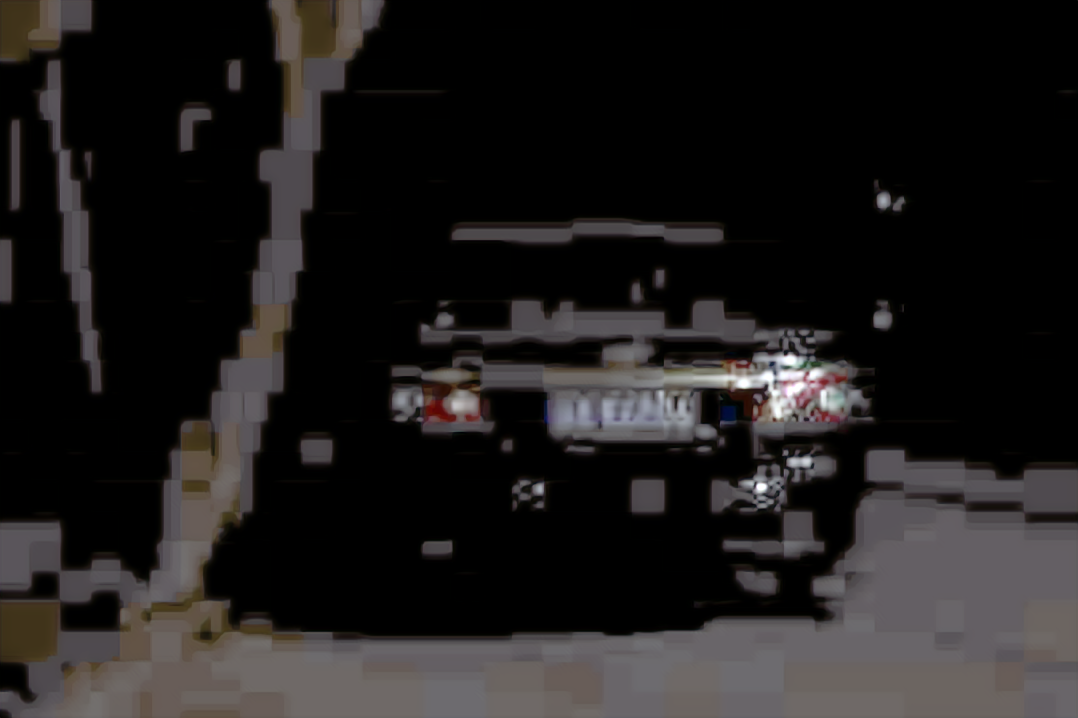

In [3]:
import numpy as np
from PIL import Image

img = Image.open('1.jpg')
img

## Get predictions

### Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

In [4]:
# Uncomment if using local repo
import sys
sys.path.append('..')
from ISR.models import RDN, RRDN

# model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
# model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')

Exception: URL fetch failure on https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ISR/rrdn-C4-D3-G32-G032-T10-x4-GANS/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5: None -- EOF occurred in violation of protocol (_ssl.c:852)

#### Alternatively, load your own weights
To load your own weights first build the model specifying the architecture parameters and then load the weights like with any Keras model.

In [ ]:
rdn = RDN(arch_params={'C': 5, 'D':16, 'G':48, 'G0':52, 'x':3})
rdn.model.load_weights('PATH/TO/WEIGHTS')

#### Baseline

In [ ]:
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

#### Prediction

In [5]:
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)

NameError: name 'model' is not defined

### Usecase: upscaling noisy images

Compress the image into the jpeg format to introduce compression artefact and lose some information.

In [ ]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

#### Baseline

In [ ]:
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

In [ ]:
model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(compressed_img))
Image.fromarray(sr_img)

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [ ]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')